## DNN Example for Fashion MNIST Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

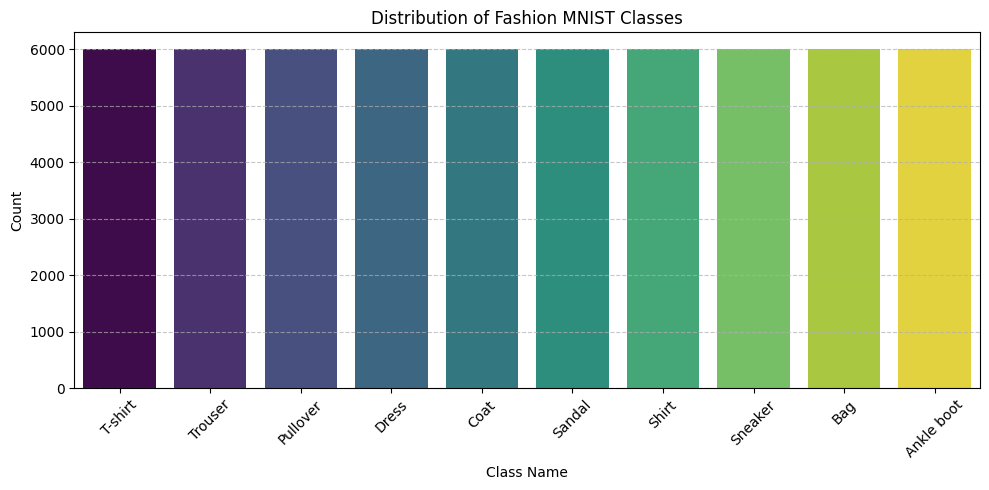

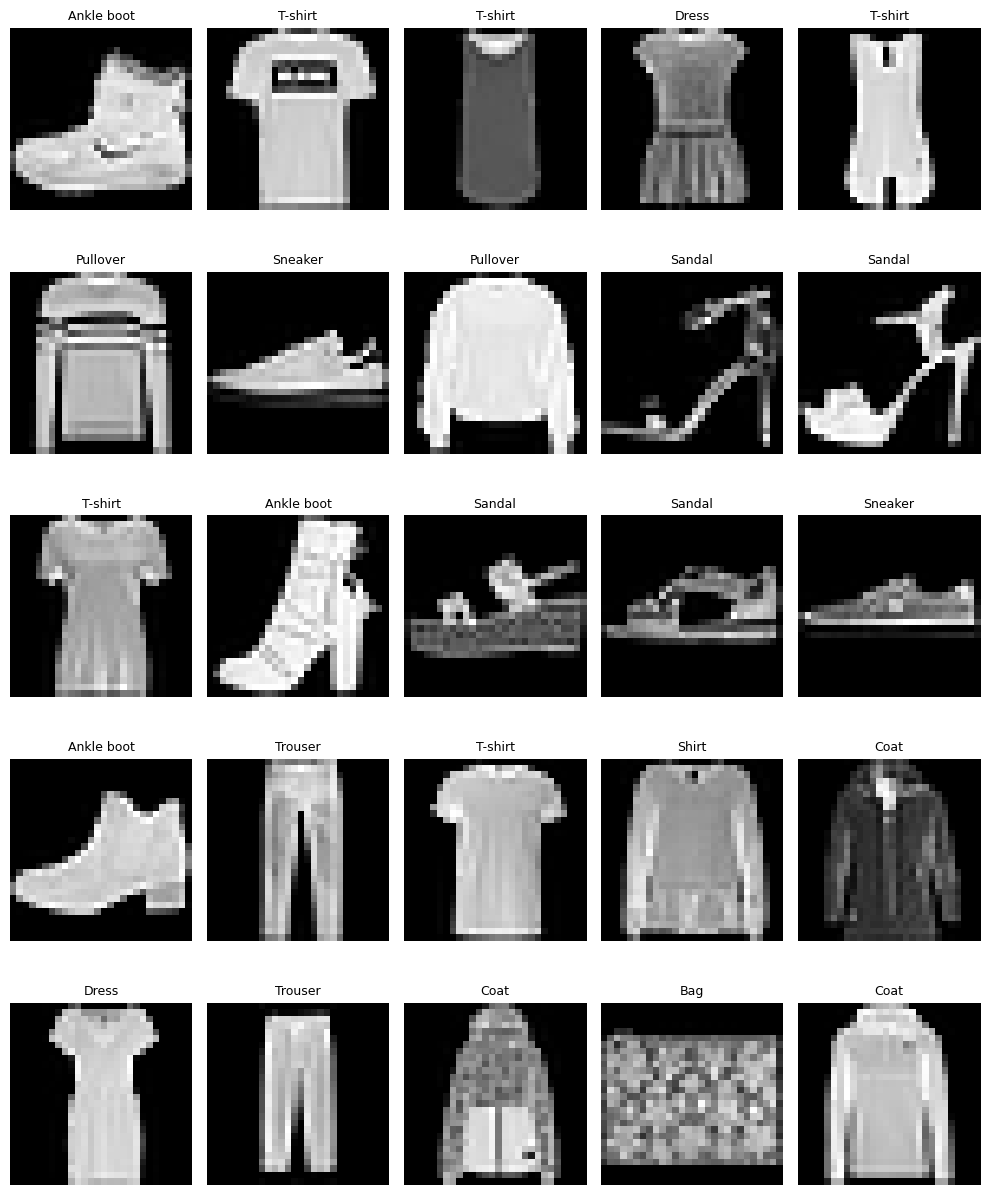

In [5]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [6]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [7]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [8]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [10]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 10s - 27ms/step - accuracy: 0.7793 - loss: 0.6384 - val_accuracy: 0.8487 - val_loss: 0.4183
Epoch 2/20
375/375 - 4s - 11ms/step - accuracy: 0.8421 - loss: 0.4440 - val_accuracy: 0.8647 - val_loss: 0.3738
Epoch 3/20
375/375 - 3s - 7ms/step - accuracy: 0.8569 - loss: 0.3989 - val_accuracy: 0.8644 - val_loss: 0.3763
Epoch 4/20
375/375 - 3s - 8ms/step - accuracy: 0.8660 - loss: 0.3770 - val_accuracy: 0.8673 - val_loss: 0.3681
Epoch 5/20
375/375 - 2s - 5ms/step - accuracy: 0.8715 - loss: 0.3585 - val_accuracy: 0.8692 - val_loss: 0.3558
Epoch 6/20
375/375 - 3s - 7ms/step - accuracy: 0.8753 - loss: 0.3447 - val_accuracy: 0.8804 - val_loss: 0.3336
Epoch 7/20
375/375 - 1s - 4ms/step - accuracy: 0.8803 - loss: 0.3307 - val_accuracy: 0.8834 - val_loss: 0.3230
Epoch 8/20
375/375 - 2s - 4ms/step - accuracy: 0.8849 - loss: 0.3188 - val_accuracy: 0.8810 - val_loss: 0.3269
Epoch 9/20
375/375 - 3s - 8ms/step - accuracy: 0.8890 - loss: 0.3094 - val_accuracy: 0.8658 - val_loss: 0.370

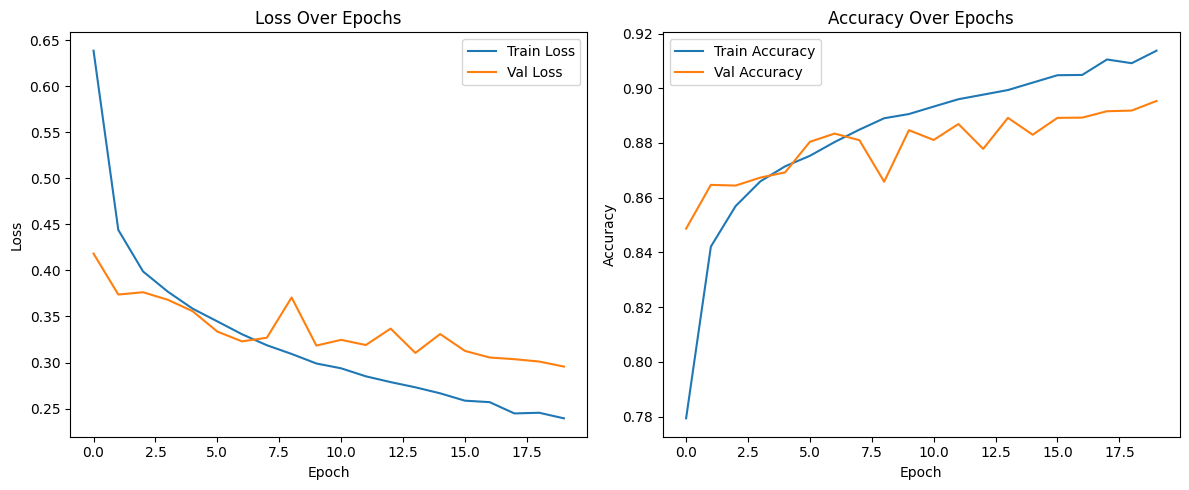

In [11]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [12]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8874


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


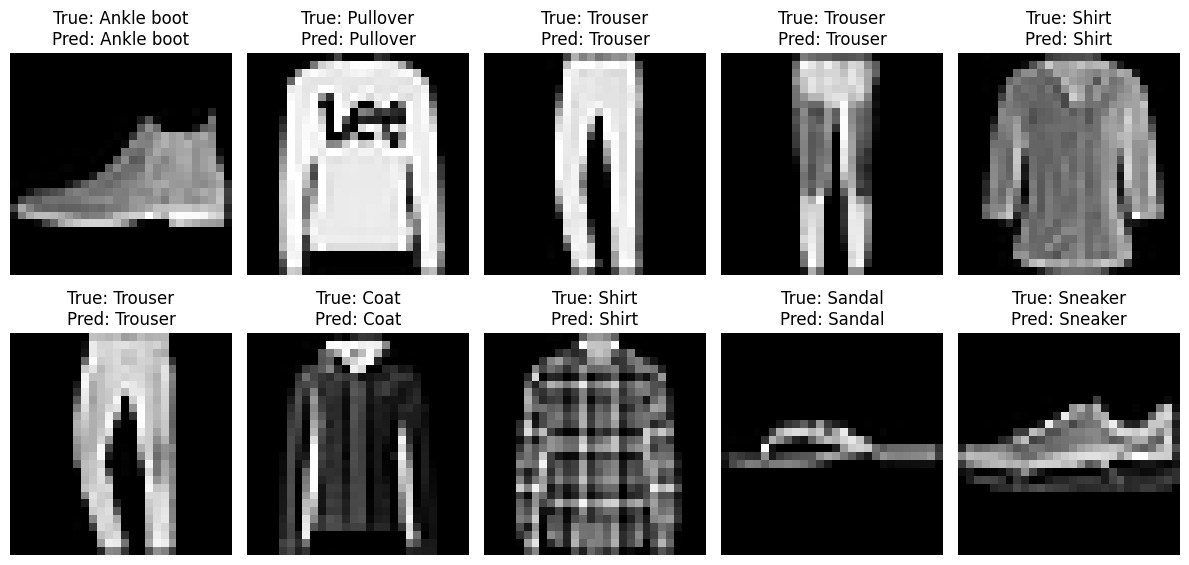

In [13]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

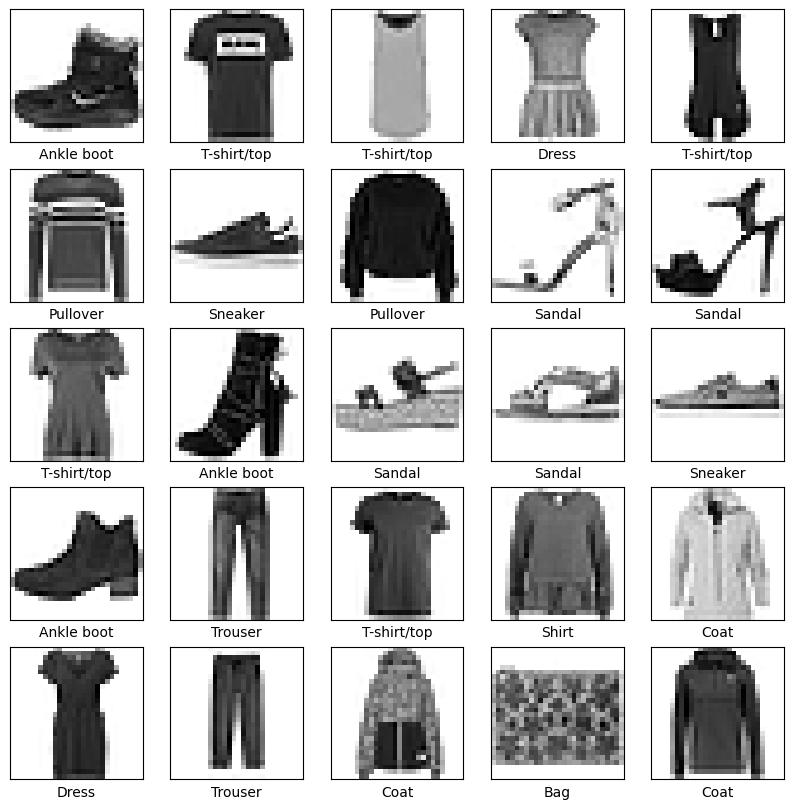

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [43]:
# Standard DNN Model
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

In [26]:
# ResNet-style DNN Model (with residual connections) enhanced
from tensorflow.keras.layers import Dense, Input, Add, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Model

def residual_block(x, units, dropout_rate=0.3):
    shortcut = Dense(units)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)

    x = Add()([shortcut, x])
    x = Activation('relu')(x)

    return x

def create_resnet_dnn():
    inputs = Input(shape=(784,))

    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    # Residual Blocks
    x = residual_block(x, 512)
    x = residual_block(x, 256)
    x = residual_block(x, 128)
    x = residual_block(x, 64)

    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)

In [44]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create and compile models
dnn_model = create_dnn()
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model = create_resnet_dnn()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# LR scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True, verbose=1)

In [51]:
# Train models
print("Training Standard DNN...")
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")

Training Standard DNN...
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0700 - val_accuracy: 0.8896 - val_loss: 0.5875
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.0624 - val_accuracy: 0.8946 - val_loss: 0.5629
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9785 - loss: 0.0558 - val_accuracy: 0.8888 - val_loss: 0.5811
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9784 - loss: 0.0568 - val_accuracy: 0.8933 - val_loss: 0.5624
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.0534 - val_accuracy: 0.8932 - val_loss: 0.6153
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9782 - loss: 0.0565 - val_accuracy: 0.8947 - val_loss: 0.6339
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9785 - loss: 0.0570 - val_accuracy: 0.8939 - val_loss: 0.5858
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9813 - loss: 

In [52]:
print("Training ResNet Style DNN...")
resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[lr_scheduler],
                                  verbose=1)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Training ResNet Style DNN...
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7109 - loss: 0.8193 - val_accuracy: 0.8456 - val_loss: 0.4159 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8476 - loss: 0.4134 - val_accuracy: 0.8546 - val_loss: 0.4037 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8652 - loss: 0.3643 - val_accuracy: 0.8520 - val_loss: 0.3966 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8754 - loss: 0.3363 - val_accuracy: 0.8673 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8801 - loss: 0.3200 - val_accuracy: 0.8490 - val_loss: 0.3914 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8880 - loss: 0.3010 - val_accuracy: 0.8773 - val_loss: 0.3406 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - ac

In [53]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

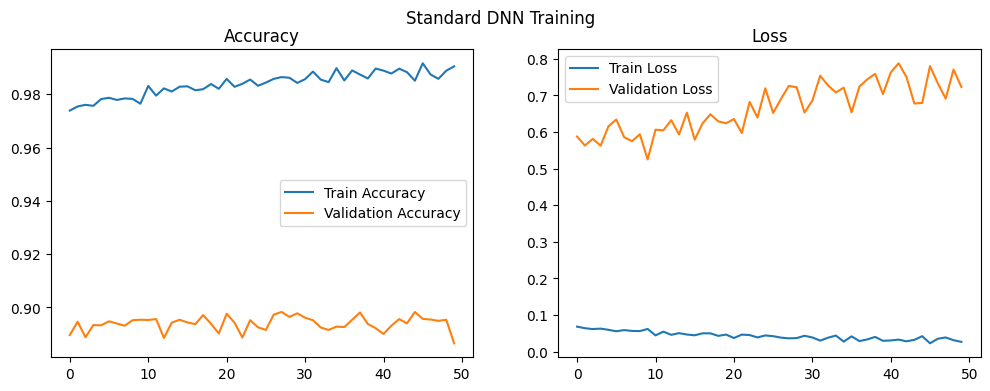

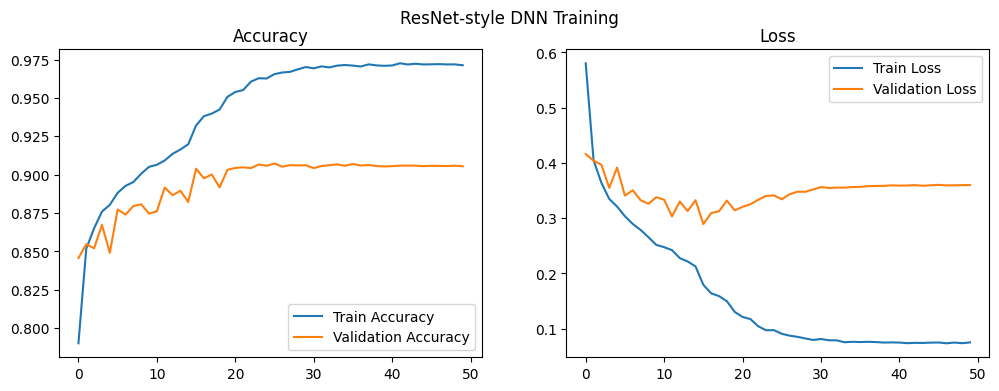

In [54]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')


Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


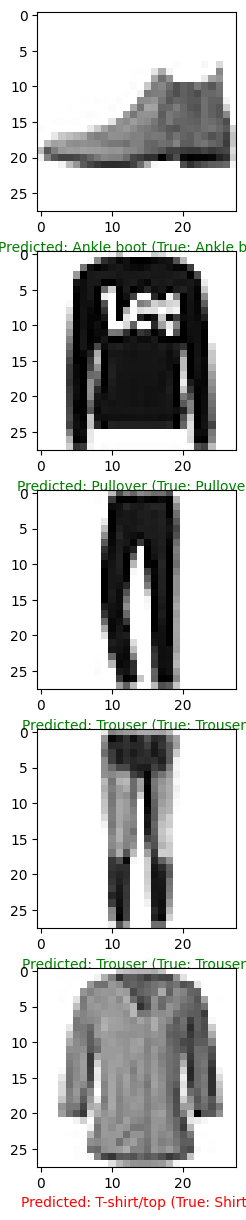


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


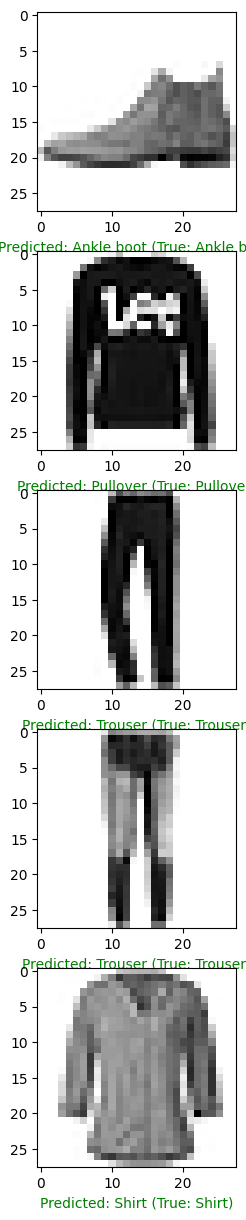

In [55]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(22, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)